<div style="background-color: orange; padding: 20px; border-top-left-radius : 20px; border-top-right-radius : 20px; text-align: center; font-size: 30px; font-weight: bold;">
    <span style="color: white;"> NLP Word2Vec</span>
</div>

## One-Hot Encoding 실습

In [23]:
import re
from konlpy.tag import Okt
from collections import Counter

In [2]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

- 글, 공백을 제외한 모든 문자를 표현하는 regex : [^ㄱ-ㅎㅏ-ㅣ가-힣 ]

In [3]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


##### 토큰화

In [4]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


In [5]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


In [6]:
vocab['임금님']

2

In [7]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


In [8]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


##### One-Hot Vector

In [10]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index-1] = 1
       return one_hot_vector

In [11]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

##### One Hot Vector by Keras

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [18]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

In [19]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [20]:
vocab_size = len(t.word_index) + 1

In [21]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


## 희소벡터의 문제점

#### 1. 차원의 저주
- DTM, TF-IDF, 원-핫 벡터는 단어장 크기에 영향을 많이 받는 **희소벡터 (Sparse Vector)이다.**
- 이러한 희소벡터는 단어가 많아질 수록 차원이 늘어나기에 **차원의 저주** 문제가 발생한다.
- 아래 그림처럼 고차원으로 늘어날수록 밀도가 감소하기 때문이다.

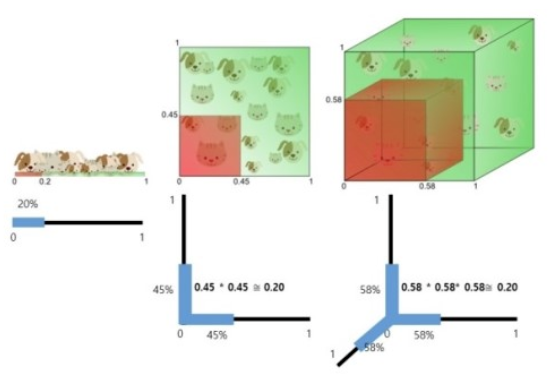

#### 2. 유사도 계산 문제
- 원-핫 벡터 방식의 인코딩 방식들은 모두 유사성을 계산하는데에 문제가 있다.
- 유사성은 내적을 기반으로 계산하는데, 임의의 두 원-핫 벡터의 내적을 구하면 대부분 서로 직교하기에 0으로 나온다.
- 따라서 희소벡터에서는 유사도를 계산할 수 없다.

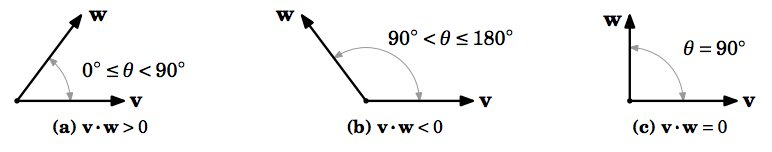

- 이를 해결하기 위해서 기계가 단어장 크기보다 적은 차원의 **밀집 벡터 (Dense Vector)를 학습하는 워드 임베딩(Word Embedding)**이 제안되었다.

## 워드 임베딩 (Word Embedding)

- 워드 임베딩에서도 한 단어를 벡터로 바꿔준다. 하지만, 해당 벡터의 길이를 일정하게 잡는다.
- 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않기에 정보를 축약해서 갖고 있다.
- 단어 사이의 관계나 문장에서 단어가 갖는 특징을 수식으로 나타내고 계산해서 표현한다.
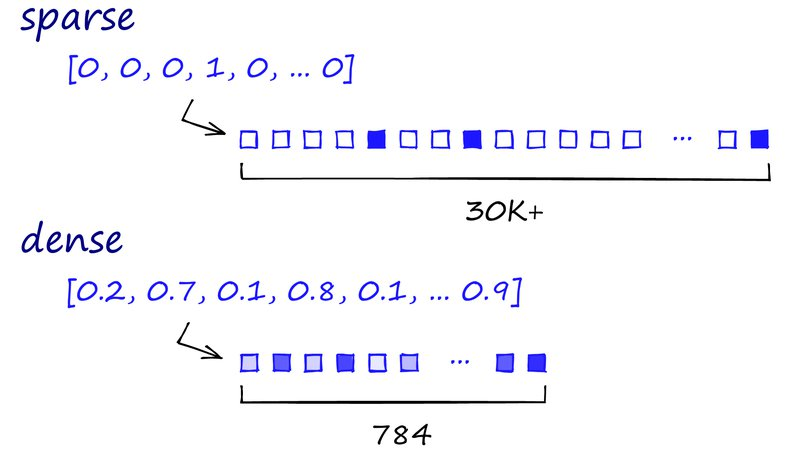

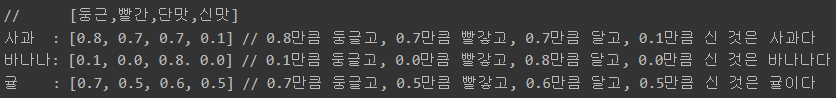

- 이러한 워드 임베딩에서 중요한 점을 두 가지이다.
    1. 한 단어를 길이가 비교적 짧은 밀집 벡터로 나타낸다.
    2. 이 밀집 벡터는 단어가 갖는 의미나 단어 간의 관계등을 어떤 식으로든 내포해야 한다.


## Word2Vec

- 임베딩 중 하나, 중심 단어와 주변 단어를 함께 파악합니다.
- 


## 분포가설
- Word2Vec은 단어를 벡터로 표현할 때, 저차원으로 구성하고 단어의 의미를 여러 차원에 분산하여 표현합니다.
- Word2Vec의 핵심 아이디어는 분포가설(Distribution Hypothesis)을 따릅니다.
- '주변 단어들을 보면 그 단어를 알 수 있다.'

- **분포가설** : 비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 갖는다.

### word2vec - CBOW

- 주변 단어를 보고 중심단어를 예측하는 것
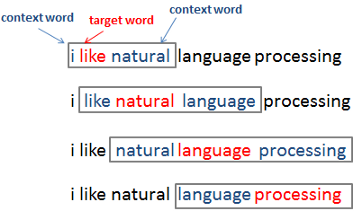

- 윈도우 크기 n을 지정하고, 주변 총 2n개의 단어를 살핍니다.
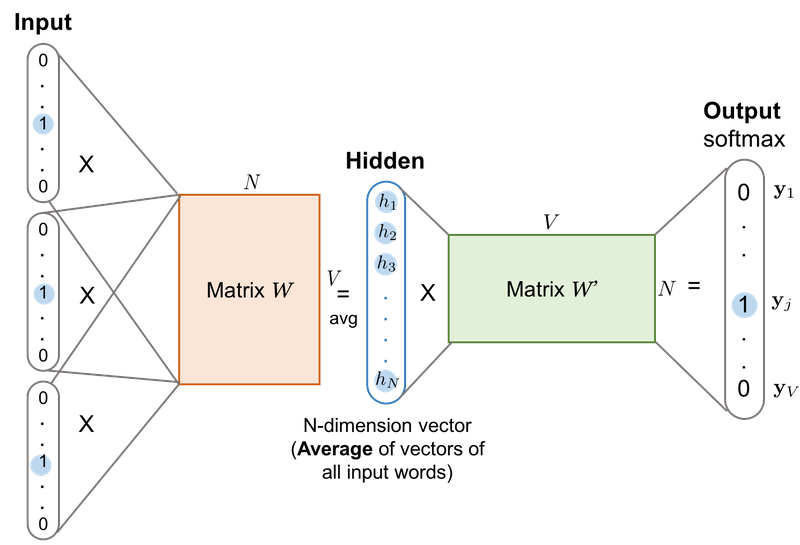

- 원-핫 벡터와 가중치 행렬과의 곱은 가중치 행렬의 i 위치에 있는 행을 그대로 가져오는 것과 동일
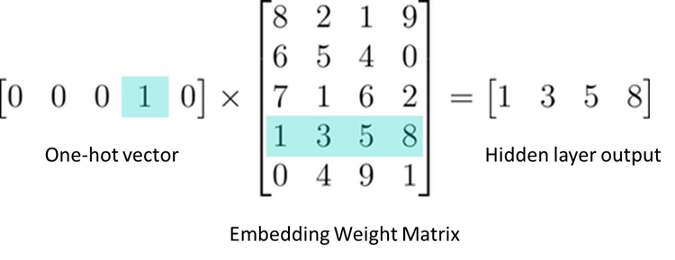

- 이는 마치 테이블에서 Look Up해오는 것과 같다고 하여 **룩업 테이블 (Look Up table)**이라고 합니다.

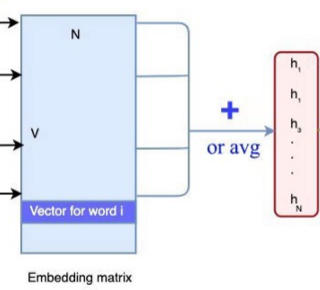

- CBoW는 출력층의 벡터를 중심 단어의 원-핫 벡터와의 손실(loss)을 최소화 하도록 학습시킵니다.
- 이런 CBOW도 아래와 같은 문제점이 존재합니다.
    1. Out-Of-Vocabulary (OOV)
    2. Polysemy (다의어)
    3. 문맥 파악의 한계
    
### Word2Vec - Skip-Gram
- 중심 단어로부터 주변 단어를 예측하는 방식
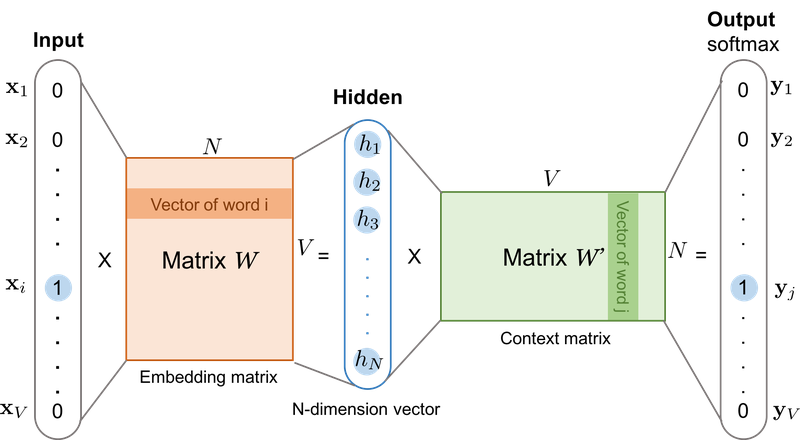

- **CBOW와의 차이점**
    1. 중심 단어로부터 주변 단어를 예측한다는 점
    2. 은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 없다.
    
 ##### 하지만, 이러한 방식은 연산량이 굉장히 많기 때문에 그대로 사용하기 어렵기에, Nagative Sampling을 진행합니다.
 
 
 ### 네거티브 샘플링 (Negative Sampling)
 - Word2Vec을 사용할 때는 **SGNS(Skip-Gram with Negative Sampling)** 방식을 사용합니다.
 - Skip-Gram의 학습 과정에서 소프트맥스 함수를 통과한 V차원의 벡터와 레이블에 해당되는 V차원의 주변 단어의 원-핫 벡터와의 오차를 구하고 역전파를 통해 **모든 단어에 대한 임베딩 벡터를 조정합니다.**
 - 네거티브 샘플링은 연산량을 줄이기 위해서 소프트맥스 함수를 사용한 V개 중 1개를 고르는 다중 클래스 분류 문제 를 시그모이드 함수를 사용한 이진 분류 문제로 바꿔줍니다.
 
    - #### 기존 Skip-Gram
        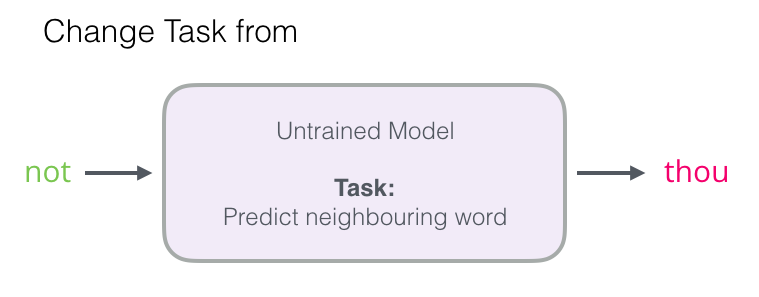
    - #### 바뀐 Skip-Gram
        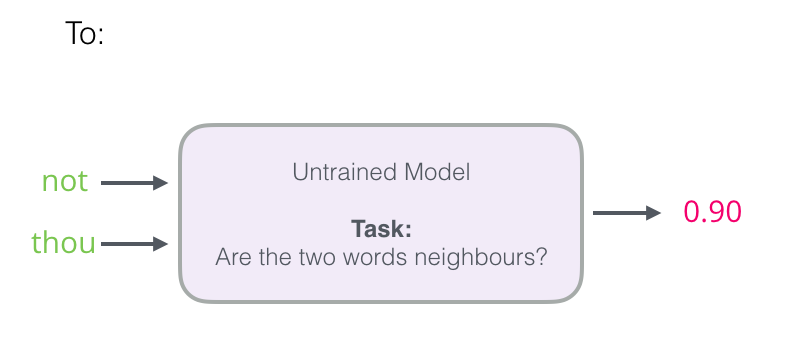
        
- **즉 중심단어와 주변단어를 입력값으로 받아 이 두 단어가 정말 이웃관계면 1을, 또는 0을 출력하는 문제로 바꿔준다. ( 다중분류 -> 이진분류 )**

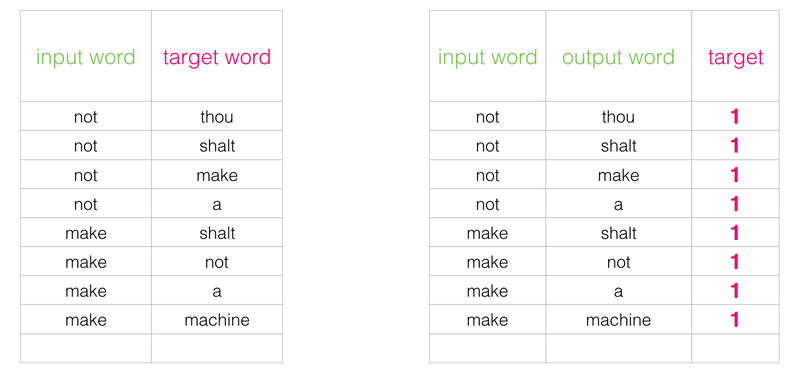
#### 정상적인 단어에는 1을 라벨링 해줍니다.

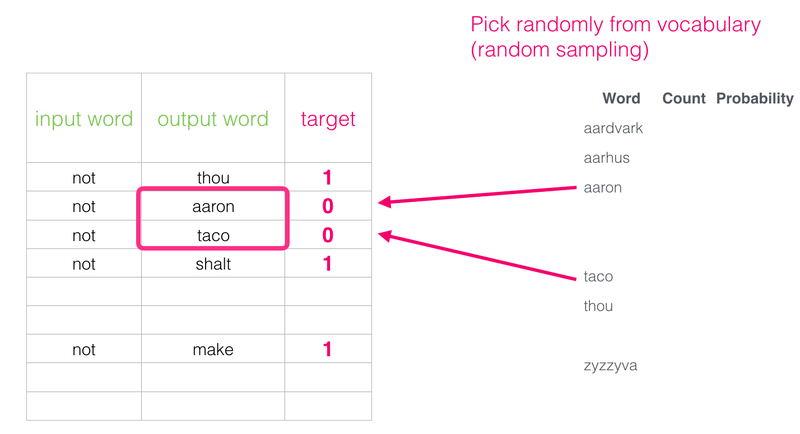
#### 랜덤으로 단어장에 있는 아무 단어나 가져와 target word로 하는 거짓 데이터셋을 만들고 0으로 레이블링을 한다. ( 거짓 데이터 셋을 만들기 때문에 Negative Sampling이라고 불립니다. )

- 이 후, 중심 단어와 주변 단어를 내적하고, 출력층의 시그모이드 함수를 지나게 하여 1 또는 0의 레이블로 부터 오차를 구해 역전파를 수행합니다.

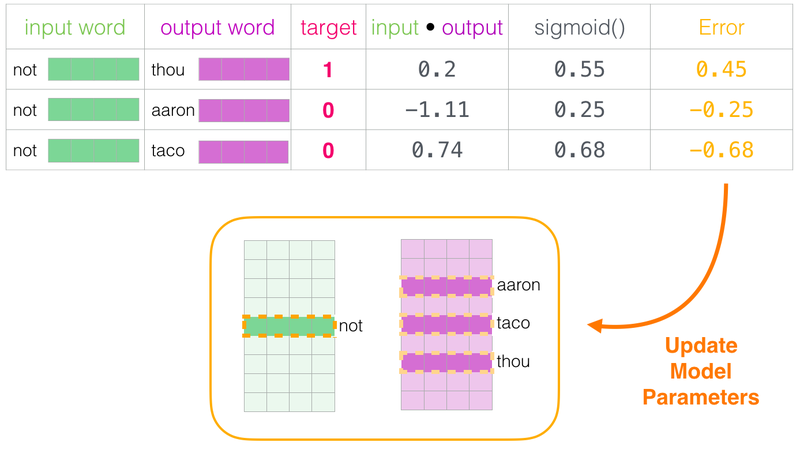

## Word2Vec과 OOV 문제

In [24]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /aiffel/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.corpus import abc
corpus = abc.sents()
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [26]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [27]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, 
                 vector_size = 100, 
                 window = 5, 
                 min_count = 5, 
                 workers = 4, 
                 sg = 0)

모델 학습 완료!


- vector size = 학습 후 임베딩 벡터의 차원
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBoW, 1은 Skip-gram.

In [28]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9232343435287476), ('skull', 0.9110913872718811), ('Bang', 0.9056085348129272), ('asteroid', 0.9051005244255066), ('third', 0.9020770788192749), ('baby', 0.8996343612670898), ('dog', 0.8985481262207031), ('bought', 0.8974419832229614), ('rally', 0.8913083672523499), ('dinosaur', 0.8888635039329529)]


In [30]:
# 모델을 저장하고 불러올 수 있습니다.
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('~/aiffel/word_embedding/w2v') 
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/word_embedding/w2v")

In [31]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9232343435287476), ('skull', 0.9110913872718811), ('Bang', 0.9056085348129272), ('asteroid', 0.9051005244255066), ('third', 0.9020770788192749), ('baby', 0.8996343612670898), ('dog', 0.8985481262207031), ('bought', 0.8974419832229614), ('rally', 0.8913083672523499), ('dinosaur', 0.8888635039329529)]


<span style="color:red;">하지만, 훈련 데이터에 없는 단어에 대해 오류를 발생시키는 OOV 문제가 발생합니다.</span>

<span style="color:red;">아래 코드를 실행하면 오류가 발생합니다. 뿐만 아니라 예를 들어서 memory의 오타인 memoryy를 넣어도 오류가 발생합니다. 훈련 데이터에는 해당 단어가 없기 때문입니다.</span>

In [32]:
# loaded_model.most_similar('overacting')

## FastText

- 매커니즘 자체는 Word2Vec을 그대로 따르고 있으나, 문자 단위 n-gram 표현을 학습한다는 점이 다르다.
- Word2Vec은 단어를 더 이상 깨질 수 없는 단위로 구분하지만, FastText는 단어 내부의 내부 단어(Subwords)들을 학습한다는 아이디어를 갖고 있다.
- **예시** :  "partial" -> ['par', 'art', 'rti', 'tia', 'ial']로 분리 후 벡터 생성
- Word2Vec과 같이 **Negative Sampling**을 수행합니다.

### OOV와 오타에 대한 대응
- FastText는 Word2Vec과 달리 OOV와 오타에 강건하다.
- 단어장에 없는 단어라도 해당 단어의 n-gram이 다른 단어에 존재하면 이로 부터 벡터값을 얻을 수 있기 때문이다.

In [33]:
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1) # word2vec과 동일한 corpus를 저장

In [34]:
fasttext_model.wv.most_similar('overacting')

[('extracting', 0.9377330541610718),
 ('debilitating', 0.9302608370780945),
 ('lifting', 0.9294414520263672),
 ('fluctuating', 0.9293279051780701),
 ('malting', 0.9256935715675354),
 ('mounting', 0.9252585172653198),
 ('emptying', 0.9245902895927429),
 ('circling', 0.9232304096221924),
 ('counting', 0.9231846332550049),
 ('hunting', 0.9231225848197937)]

In [35]:
fasttext_model.wv.most_similar('memoryy')

[('memory', 0.9482765197753906),
 ('musical', 0.862243115901947),
 ('basic', 0.8596653342247009),
 ('mechanism', 0.8525474667549133),
 ('mechanisms', 0.851020872592926),
 ('mechanical', 0.844933032989502),
 ('yourself', 0.8387527465820312),
 ('intelligence', 0.8365700840950012),
 ('technical', 0.83566814661026),
 ('athletic', 0.8319622278213501)]

### 한국어에서의 FastText
- 영어에서 n-gram이 알파벳 단위라면, 한국어에서는 음절 단위로 볼 수 있다.

1) 음절단위 FastText

    - n = 3일때, '텐서플로우'의 트라이그램 벡터는 아래와 같다.
    - <텐서, 텐서플, 서플로, 플로우, 로우>, <텐서플로우>

2) 자소단위 FastText
- 하지만 한국어는 음절단위보다 자소단위가 더욱 잘 동작한다.
- 단어에 대해 초,중,종성을 분리한다고 했을 때, 종성이 존재하지 않는 경우에 '_' 라는 토큰을 사용한다면 텐서플로우는 아래와 같이 분리된다.
    -  <ㅌㅔ,ㅌㅔㄴ,ㅔㄴㅅ,ㄴㅅㅓ,ㅅㅓ_, ...중략... >
    
**하지만  프랑스와 같은 고유 명사는 분해해도 이득을 볼 수 없다. 그 이유는 한국어 어휘를 자모 수준으로 분리하여 학습하는 것은 일 부 어휘의 특성을 학습하는 데 큰 도움이 되지 않거나 가끔 성능의 저하를 일으키기 때문이다.**

## Glove (Global Vectors for Word Representation)
- 워드 임베딩의 두 가지 접근 방법인 카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다.
- 유사도를 반영할 수 없는 희소표현 방식인 DTM을 차원 축소하여 밀집 표현(dense representation)으로 임베딩 하는 방법이 LSA(Latent Semantic Analysis)이다.

### 잠재 의미 분석 (LSA, Latent Semantic Analysis)
- 단어-문서 행렬, 단어-문맥행렬 등 입력 데이터에 특이값 분해를 수행하여 데이터의 차원 수를 줄여 계산 효율성을 키우는 한편, 행간에 숨어있는 의미를 이끌어내기 위한 방법론이다.[참고링크](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)

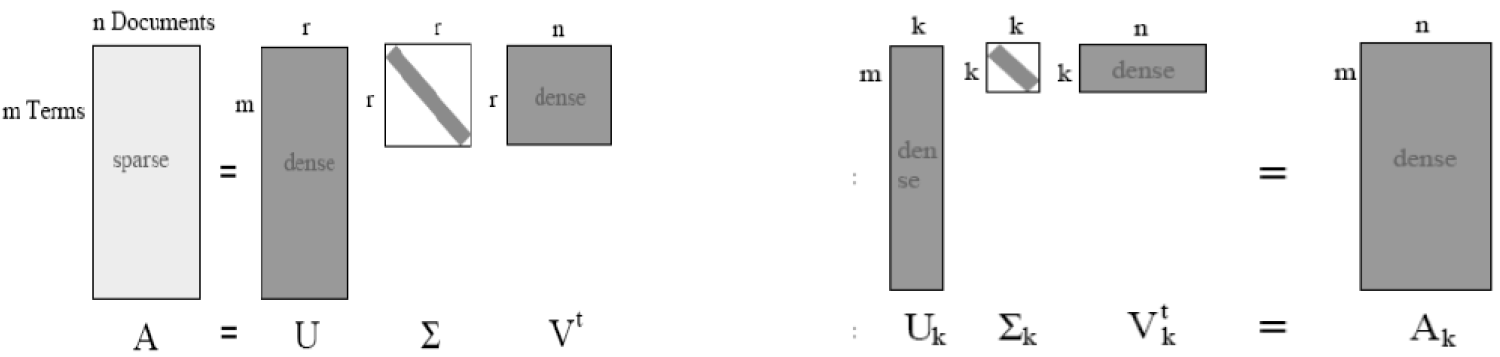


### 윈도우 기반 동시 등장 행렬 (Window based Co-occurrence Matrix)
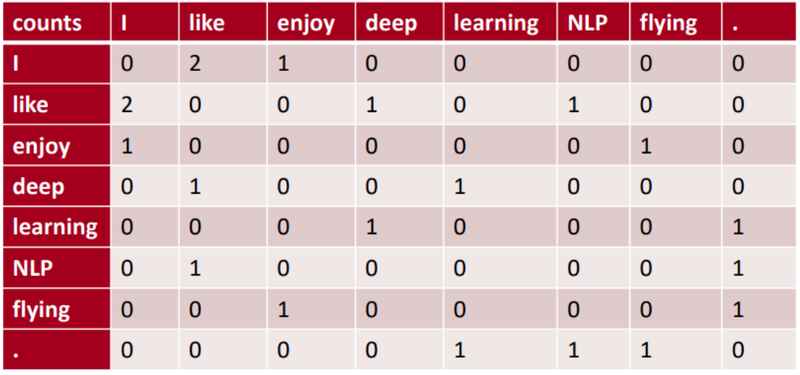

- 어떤 i 단어의 윈도우 크기(window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
- 동시 등장 행렬은 전치(transpose)해도 동일한 행렬이 된다는 특징이 있다.

### 동시 등장 확률 (Co-occurence Probability)

- **동시 등장 확률 P(k∣i) **는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다. 이때 i를 중심 단어(center word), k를 주변 단어(context word)라고 한다.

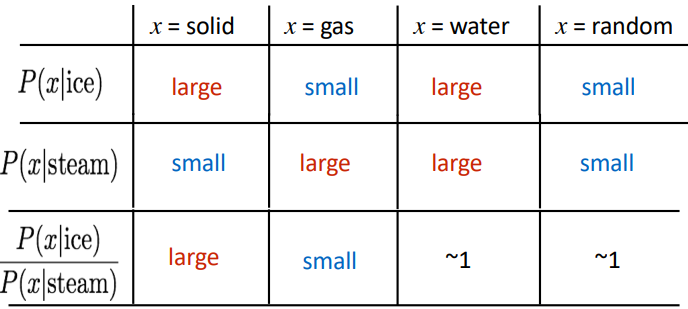

### GloVe의 손실함수
- GloVe의 아이디어 : 전체 코퍼스에서의 **동시 등장 빈도의 로그값**과 **중심 단어 벡터와 주변 단어 벡터의 내적값**의 차이가 최소화되도록 두 벡터의 값을 학습하는 것

- 손실함수를 정의하기 위해 아래와 같은 변수를 정의한다.
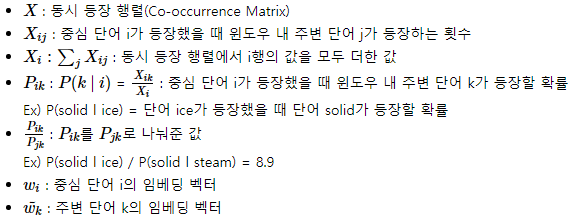

## GloVe 실습
- 2015부터 관리가 되지 않고 있다.
- 따라서 pre-trained된 GloVe 모델을 불러와서 간단한 실습을 해보고자 한다.
- 소문자로 이루어진 데이터로만 학습했기 때문에 알파벳 소문자만 인식한다.

In [39]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")  # glove vectors 다운로드
glove_model.most_similar("dog")  # 'dog'과 비슷한 단어 찾기

[('cat', 0.9218004941940308),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583713531494),
 ('puppy', 0.7754920721054077),
 ('pet', 0.7724708318710327),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570278167725),
 ('bite', 0.7387937307357788)]

In [40]:
glove_model.most_similar('overacting')

[('impudence', 0.7842012047767639),
 ('puerile', 0.7816032767295837),
 ('winningly', 0.7644237875938416),
 ('grossness', 0.7576098442077637),
 ('deconstructions', 0.748936653137207),
 ('over-the-top', 0.7460805773735046),
 ('buffoonery', 0.746045708656311),
 ('impetuosity', 0.7415392398834229),
 ('sophomoric', 0.736961841583252),
 ('zaniness', 0.7353197336196899)]

In [41]:
glove_model.most_similar('memoryy')

KeyError: "Key 'memoryy' not present"

<span style="color: red;">아직 GloVe에서도 Word2Vec과 같은 OOV 문제를 갖고 있어서 오류가 발생한다.</span>

OOV(Out-Of-Vocabulary) 문제란, 기계학습 모델이 훈련 데이터에서는 보지 못했지만,
테스트 데이터에 등장하는 단어를 인식하지 못하는 문제다.

FastText는 훈련 데이터에서 등장하지 않은 단어라도 서브워드로 분해하면서 해당 서브워드를 포함하고 있는 다른 단어들의 임베딩 벡터를 활용하여 새로운 단어의 임베딩 벡터를 만들어 OOV 문제를 해결했다.

<div style="background-color: Orange; padding: 20px; border-bottom-right-radius : 20px; border-bottom-left-radius : 20px; text-align: center; font-size: 17px;">
    
</div>